Derive spec2vec embeddings of MS/MS spectra

In [1]:
import os
import sys
import gensim
import numpy as np

ROOT = os.path.dirname(os.getcwd())
#path_data = os.path.join(ROOT, 'data')
path_data = 'C:\\Users\\Gosia\\Desktop\\'
sys.path.insert(0, ROOT)

Import dataset to create embeddings from, here: pre-processed dataset "Unique InchiKeys"

In [2]:
import passatuto_parser as pp
sys.path.append('C:\\Users\\Gosia\\Desktop\\FDR-Metabolomics\\src\\passatuto_parser.py')


pre_spectrums_query = pp.PassatutoParser(r'C:\\Users\\Gosia\\Desktop\\MassbankOrbi').parse_folder()
pre_spectrums_lib = pp.PassatutoParser('C:\\Users\\Gosia\\Desktop\\Gnps_Noise_Filtered').parse_folder()

# Using MatchMS to create spectra for both
from matchms.importing.load_from_json import as_spectrum
spectrums_query = []
for i, s in enumerate( pre_spectrums_query ):
    spectrums_query.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d' % i)
        
spectrums_lib = []
for i, s in enumerate( pre_spectrums_lib ):
    spectrums_lib.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d' % i)
        

processed 100 files
processed 200 files
processed 300 files
processed 400 files
Finished parsing of 457 spectra 
processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
Finished parsing of 4095 spectra 
processed 100
processe

In [3]:
from matchms.filtering import normalize_intensities
# Spec2Vec trained model requires normalizing
spectrums_query = [normalize_intensities(s) for s in spectrums_query]
spectrums_lib = [normalize_intensities(s) for s in spectrums_lib]


Load pretrained spec2vec model

In [4]:
path_models = os.path.join(path_data, "trained_models_1")
model_file = os.path.join(path_models, "spec2vec_size_170.model")

# Load pretrained model
model = gensim.models.Word2Vec.load(model_file)
print(model_file)

C:\Users\Gosia\Desktop\trained_models_1\spec2vec_size_170.model


Create spectrum "documents"

In [5]:
from spec2vec import Spec2Vec
from spec2vec import SpectrumDocument

documents_query = [SpectrumDocument(s, n_decimals=2) for s in spectrums_query]
documents_lib = [SpectrumDocument(s, n_decimals=2) for s in spectrums_lib]
print(documents_query)


[<spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F613008EB0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F613008F40>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F613008FA0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F613008CA0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F613008EE0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F6130088E0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F60DA85070>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F60DA851F0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F60DA85220>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F60DA85310>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F60DA85580>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F60DA85520>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x000001F60DA85550>, <spec2vec.SpectrumDocume


Derive embeddings

In [6]:
from tqdm.notebook import tqdm  # optional, just to get a progress bar
from spec2vec.vector_operations import calc_vector


intensity_weighting_power = 0.5
allowed_missing_percentage = 70 # specify the maximum (weighted) fraction of the spectrum that is allowed to be missing

vector_size = model.vector_size
print(f"Embedding vector size: {vector_size}")

embeddings_spec2vec_query = np.zeros((len(documents_query), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_query)):
    embeddings_spec2vec_query[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)
embeddings_spec2vec_lib = np.zeros((len(documents_lib), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_lib)):
    embeddings_spec2vec_lib[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)

Embedding vector size: 170


Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.32%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.24%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.03%.



In [7]:
print([np.round(x, 4) for x in embeddings_spec2vec_query[0,:]])
print([np.round(x, 4) for x in embeddings_spec2vec_lib[0,:]])

[23.2044, -20.389, 28.4649, 59.8809, -15.1307, -21.7299, 2.1196, 33.4574, 17.0029, 53.8169, -3.2227, -2.7188, -15.8201, -50.2283, 5.2874, 23.9428, -24.4773, -7.0739, 1.8695, 44.6728, -38.4968, -24.9718, 8.7718, -79.5329, 38.4108, 16.002, -6.078, 16.9825, 15.2667, 2.3005, 20.5668, -13.9236, -21.9189, 21.7501, 11.967, 1.6314, -39.6661, -9.1814, 49.666, -13.4897, -32.6787, -7.5778, 59.4199, -33.7258, -13.5606, 24.9558, -16.3025, 6.2814, -1.6132, 29.1948, 5.3982, -1.5789, -5.9826, -0.0874, 28.0036, -20.1628, -63.2055, -50.5374, 24.1685, -28.7643, 13.7203, 19.0774, 64.7883, 35.5039, -46.9714, 30.4529, 59.0905, 4.2571, -17.5899, -26.9854, 17.012, 52.6083, 22.1841, -53.6553, -43.3623, 37.2474, 59.3553, 18.8403, 46.4893, 22.9234, -89.8358, -4.1095, 56.6307, -79.1973, 30.0058, -10.5056, 18.3867, 5.1393, 49.3855, 86.7074, 56.3102, -31.2564, -34.4686, 9.259, -43.9436, -37.6386, -25.7461, 12.5767, 5.2235, 38.4426, -7.9346, 4.4016, 2.7611, 62.4138, -43.9911, 57.6108, 48.338, -43.8801, -19.3797, -24

In [8]:
from cosine_calc import get_hits

hits,_ = get_hits( documents_query, documents_lib, spec2vec_model=model,
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage, passatutto=True)
len(hits)

Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.


362

In [9]:
documents_query[0]._obj.metadata

{'compound_name': 'Acamprosate',
 'instrument': 'LTQ Orbitrap XL Thermo Scientific',
 'formula_smiles': 'C5H11NO4S',
 'smiles': 'O=S(=O)(O)CCCNC(=O)C',
 'inchi': 'InChI=1S/C5H11NO4S/c1-5(7)6-3-2-4-11(8,9)10/h2-4H2,1H3,(H,6,7)(H,8,9,10)',
 'charge': 1,
 'adduct': '[M+H]+',
 'parent_mass': 182.0482}

In [10]:
# Loading the decoy database
pre_spectrums_decoys = pp.DecoyParserPassatuto(r'C:\\Users\\Gosia\\Desktop\\GnpsDecoyConditionalPeaks').parse_folder()
pre_spectrums_decoys_rand = pp.DecoyParserPassatuto(r'C:\\Users\\Gosia\\Desktop\\GnpsDecoyRandomPeaks').parse_folder()

processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
Finished parsing of 4095 spectra 
processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 f

In [11]:
# Using MatchMS to create spectra decoy
decoys = []
for i, s in enumerate( pre_spectrums_decoys ):
    decoys.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d'% i)

decoys_rand = []
for i, s in enumerate( pre_spectrums_decoys_rand ):
    decoys_rand.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d'% i)


processed 100
processed 200
processed 300
processed 400
processed 500
processed 600
processed 700
processed 800
processed 900
processed 1000
processed 1100
processed 1200
processed 1300
processed 1400
processed 1500
processed 1600
processed 1700
processed 1800
processed 1900
processed 2000
processed 2100
processed 2200
processed 2300
processed 2400
processed 2500
processed 2600
processed 2700
processed 2800
processed 2900
processed 3000
processed 3100
processed 3200
processed 3300
processed 3400
processed 3500
processed 3600
processed 3700
processed 3800
processed 3900
processed 4000
processed 100
processed 200
processed 300
processed 400
processed 500
processed 600
processed 700
processed 800
processed 900
processed 1000
processed 1100
processed 1200
processed 1300
processed 1400
processed 1500
processed 1600
processed 1700
processed 1800
processed 1900
processed 2000
processed 2100
processed 2200
processed 2300
processed 2400
processed 2500
processed 2600
processed 2700
processed 280

In [12]:

from matchms.filtering import normalize_intensities
from matchms.filtering import require_minimum_number_of_peaks
from matchms.filtering import select_by_mz
from matchms.filtering import select_by_relative_intensity
from matchms.filtering import reduce_to_number_of_peaks
from matchms.filtering import add_losses

def post_process(s):
    s = normalize_intensities(s)
    s = select_by_mz(s, mz_from=0, mz_to=1000)
    s = require_minimum_number_of_peaks(s, n_required=10)
    s = reduce_to_number_of_peaks(s, n_required=10, ratio_desired=0.5)
    if s is None:
        return None
    s_remove_low_peaks = select_by_relative_intensity(s, intensity_from=0.001)
    if len(s_remove_low_peaks.peaks) >= 10:
        s = s_remove_low_peaks
        
    s = add_losses(s, loss_mz_from=5.0, loss_mz_to=200.0)
    return s

# Spec2Vec trained model requires normalizing
decoys = [post_process(s) for s in decoys]
decoys_rand = [post_process(s) for s in decoys_rand]
# omit spectrums that didn't qualify for analysis

decoys = [s for s in decoys if s is not None]
decoys_rand = [s for s in decoys_rand if s is not None]

C:\Users\Gosia\anaconda3\envs\fdr-metab\lib\site-packages\matchms\filtering\normalize_intensities.py:21: RuntimeWarning: invalid value encountered in true_divide
  normalized_intensities = intensities / max_intensity


In [13]:
documents_decoys = [SpectrumDocument(s, n_decimals=2) for s in decoys]
documents_decoys_rand = [SpectrumDocument(s, n_decimals=2) for s in decoys_rand]


In [14]:
vector_size = model.vector_size
print(f"Embedding vector size: {vector_size}")

embeddings_spec2vec_decoys = np.zeros((len(documents_decoys), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_decoys)):
    embeddings_spec2vec_decoys[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)
embeddings_spec2vec_decoys_rand = np.zeros((len(documents_decoys_rand), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_decoys_rand)):
    embeddings_spec2vec_decoys_rand[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)

Embedding vector size: 170


Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.90%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.84%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.27%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.38%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.51%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.34%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.20%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.63%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.02%.
Found 14 word(s) missing in th

Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.62%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.17%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.53%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.57%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.40%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.65%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.33%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.33%.
Found 2 word(s) missin

Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.25%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.56%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.84%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.71%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.74%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.37%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.36%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.86%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.46%.
Found 27 word(s) missing

Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.26%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.62%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.82%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.22%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.23%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.60%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.31%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.82%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.24%.
Found 11 word(s) missi

Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.55%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.62%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.51%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.93%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.66%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.54%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.24%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.64%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.13%.
Found 16 word(s) missing 

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.38%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.29%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.22%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.94%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.98%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.32%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.71%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.40%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.13%.
Found 35 word(s) missing 

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.36%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.81%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.46%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.53%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.03%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.94%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.87%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.11%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.78%.
Found 5 word(s) missin

Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.31%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.66%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.12%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.82%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.71%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.78%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.60%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.30%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.68%.
Found 11 word(s) mis

Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.88%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.22%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.07%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.14%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.59%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.33%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.53%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.47%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.25%.
Found 4 word(s) missing 

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.23%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.25%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.78%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.41%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.94%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.06%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.43%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.19%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.84%.
Found 2 word(s) missin

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.54%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.11%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.94%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.30%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.48%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.20%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.61%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.19%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.29%.
Found 18 word(s) missing in t

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.50%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.99%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.02%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.10%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.57%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.91%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.18%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.06%.
Found 5 word(s) missing in the

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.79%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.15%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.69%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.71%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.61%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.66%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.42%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.96%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.14%.
Found 22 word(s) missing 

Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.77%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.72%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.49%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.81%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.21%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.37%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.56%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.36%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.41%.
Found 1 word(s) missing in

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.89%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.28%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.53%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.41%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.45%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.75%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.42%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.48%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.63%.
Found 16 word(s) missing in 

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.95%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.74%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.06%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.68%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.62%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.40%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.85%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.25%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.47%.
Found 28 word(s) missi

Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.01%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.24%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.22%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.84%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.95%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.83%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.25%.
Found 10 word(s) missin

Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.83%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.66%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.96%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.29%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.37%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.82%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.22%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.90%.
Found 32 word(s) missi

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.13%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.22%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.90%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.28%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.79%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.78%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.19%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.25%.
Found 12 word(s) missing 

Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.71%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.52%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.32%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.08%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.46%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.00%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.36%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.51%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 23 word(s) missi

Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.13%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.58%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.72%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.09%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.24%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.96%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.10%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.76%.
Found 14 word(s) mis

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.60%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.79%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.97%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.94%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.12%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.03%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.04%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.45%.
Found 21 word(s) miss

Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.84%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.73%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.27%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.87%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.80%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.57%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.95%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 18 word(s) mi

Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.01%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.72%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.92%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.69%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.00%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.57%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.38%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.22%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.22%.
Found 17 word(s) missin

Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.13%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.41%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.26%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.86%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.80%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.04%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.27%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.68%.
Found 25 word(s) miss

Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.49%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.00%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.65%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.09%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.85%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.03%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.72%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.95%.
Found 25 word(s) mi

Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.72%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.54%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.12%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.92%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.75%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.07%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.12%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.47%.
Found 18 word(s) miss

Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.52%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.05%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.79%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.12%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.51%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.77%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.06%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.53%.
Found 12 word(s) mis

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.61%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.28%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.64%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.42%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.74%.



Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.01%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.36%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.35%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.71%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.81%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.90%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.58%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.79%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.28%.
Found 28 word(s) missing 

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.48%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.17%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.17%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.19%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.93%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.80%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.72%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.77%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.58%.
Found 16 word(s) missing 

Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.78%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.48%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.57%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.52%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.13%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.85%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.38%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.56%.
Found 11 word(s) missi

Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.09%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.89%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.98%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.97%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.06%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.17%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.00%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.79%.
Found 12 word(s) missing in t

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.78%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.41%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.93%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.05%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.71%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.43%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.56%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.55%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.86%.
Found 12 word(s) missing in

Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.17%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.28%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.29%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.39%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.96%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.56%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.61%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.94%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.11%.
Found 20 word(s) missi

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.18%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.86%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.66%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.65%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.79%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.17%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.72%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.92%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.50%.
Found 8 word(s) missing 

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.12%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.97%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.09%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.98%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.92%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.07%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.42%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.41%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.65%.
Found 12 word(s) missing

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.38%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.30%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.90%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.78%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.67%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.35%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.34%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.91%.
Found 2 word(s) missing in th

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.90%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.58%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.00%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.59%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.35%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.40%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.42%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.82%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.29%.
Found 10 word(s) missin

Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.74%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.34%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.12%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.42%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.06%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.13%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.59%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.68%.
Found 42 word(s) missi

Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.53%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.22%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.79%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.37%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.44%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.80%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.55%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.42%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.45%.
Found 1 word(s) missin

Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.26%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.34%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.01%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.24%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.00%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.07%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.76%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.12%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.44%.
Found 19 word(s) missing

Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.32%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.52%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.34%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.55%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.58%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.07%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.85%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 38 word(s) missing

Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.10%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.23%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.29%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.61%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.35%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.53%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.66%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.37%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.51%.
Found 13 word(s) missing in 

Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.68%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.78%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.62%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.10%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.38%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.81%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.15%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.13%.
Found 19 word(s) missing 

Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.88%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.51%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.03%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.23%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.07%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.70%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.21%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.98%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.49%.
Found 7 word(s) missing in

Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.91%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.22%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.13%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.70%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.48%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.63%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.24%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.12%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.80%.
Found 10 word(s) missi

Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.81%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.23%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.73%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.85%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.45%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.54%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.30%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.93%.
Found 7 word(s) missing 

Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.52%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.28%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.75%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.17%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.52%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.25%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.47%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.67%.
Found 1 word(s) missing 

Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.50%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.93%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.77%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.23%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.49%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.36%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.56%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.07%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.85%.
Found 19 word(s) missing

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.95%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.43%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.77%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.19%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.32%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.97%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.59%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.71%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.65%.
Found 15 word(s) missin

Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.35%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.61%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.01%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.72%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.83%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.81%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.58%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.34%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.97%.
Found 41 word(s) missin

Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 44.96%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.70%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.74%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.79%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.41%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.59%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.94%.
Found 9 word(s) missin

Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.41%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.69%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.32%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.19%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.03%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.42%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.09%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.02%.
Found 35 word(s) miss

Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.52%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.00%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.61%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.20%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.65%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.43%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.68%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.13%.
Found 13 word(s) missi

Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.79%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.86%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.97%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.30%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 47.77%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.93%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.09%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.07%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.95%.
Found 21 word(s) missing

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.22%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.75%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.67%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.88%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.18%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.54%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.09%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.32%.
Found 17 word(s) mis

Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 45.07%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.92%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.59%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.23%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.58%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.54%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.80%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.83%.
Found 5 word(s) missing

Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 48.31%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 50.00%.



In [15]:

def add_pmz(specs):
    from rdkit.Chem import MolFromSmiles, MolToSmiles, MolFromInchi
    from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcMolFormula
    for s in specs:
        s._obj.set('precursor_mz', s._obj.get('parent_mass', 0))
        
add_pmz(documents_query)

In [16]:
import copy
documents_decoys = []
for v,d in zip(embeddings_spec2vec_decoys,documents_lib):
    #print("knockoff:",ko,"vector",v,"document",d)
    #print("\n")
    e = copy.deepcopy(d)
    e._obj.set('inchi', 'knockoff')
    e._obj.set('inchikey_inchi', 'knockoff')
    e._obj.set('vector', v)
    documents_decoys.append(e)

hits_decoys, _ = get_hits(documents_query, documents_decoys, decoys=True, spec2vec_model=model, precursor_tol=3, metaKey="precursor_mz",
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage, passatutto=True)


documents_decoys_rand = []
for v,d in zip(embeddings_spec2vec_decoys_rand,documents_lib):
    #print("knockoff:",ko,"vector",v,"document",d)
    #print("\n")
    e = copy.deepcopy(d)
    e._obj.set('inchi', 'knockoff')
    e._obj.set('inchikey_inchi', 'knockoff')
    e._obj.set('vector', v)
    documents_decoys_rand.append(e)

hits_decoys_rand, _ = get_hits(documents_query, documents_decoys_rand, decoys=True, spec2vec_model=model, precursor_tol=3, metaKey="precursor_mz",
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage, passatutto=True)


In [17]:
# Calculating true q-value scores
from q_value_calc import calculate_q_value
q_list_true = calculate_q_value(hits)

In [18]:
# Calculating estimated q-value scores
q_list_estimated = calculate_q_value(hits+hits_decoys,True)
q_list_estimated_rand = calculate_q_value(hits+hits_decoys_rand,True)
print(q_list_estimated)

[(0, True, 0.9844884375458629), (0.0, True, 0.9698243616040828), (0.0, True, 0.9658468445656291), (0.0, True, 0.964103094121279), (0.0, True, 0.9564455660989527), (0.0, True, 0.9540544960918477), (0.0, True, 0.950035461426787), (0.0, True, 0.9391245656011535), (0.0, True, 0.9362330214014886), (0.0, True, 0.9361534299998694), (0.0, True, 0.9255215439238761), (0.0, True, 0.9216569795155606), (0.0, True, 0.9086814900522084), (0.0, True, 0.9051868445773187), (0.0, True, 0.903651660199461), (0.0, True, 0.9029245582595465), (0.0, True, 0.894454534180905), (0.0, True, 0.8876952310748112), (0.0, True, 0.8873707639818331), (0.0, True, 0.8863930069490383), (0.0, True, 0.8851730758969004), (0.0, True, 0.8827654397922031), (0.0, True, 0.8784523587704233), (0.0, True, 0.8775753898507476), (0.0, True, 0.8767801939994743), (0.0, True, 0.8761454792188785), (0.0, True, 0.8752359951119991), (0.0, True, 0.8745721598510978), (0.0, True, 0.869524903206355), (0.0, True, 0.8604192562874733), (0.0, True, 0.86

In [45]:
from knockoffs import generate_knockoffs, evaluate_knockoff_performance
#diags = [0.00000070, 0.00000075, 0.00000080, 0.00000085, 0.00000090, 0.00000095]
diags = [0.00000191]
q_list_knockoffs = {}
for diag in diags:
    knockoff_documents = generate_knockoffs(model,documents_lib,allowed_missing_percentage=allowed_missing_percentage,n_components=170, covariance_type='diag', diagonal_matrix=diag)

    hits_knockoffs, _ = get_hits(documents_query, knockoff_documents, decoys=True, spec2vec_model=model, precursor_tol=3, metaKey="precursor_mz",
                                                            intensity_weighting_power=intensity_weighting_power,
                                                            allowed_missing_percentage=allowed_missing_percentage, passatutto=True)
    q_list_knockoffs[diag] = calculate_q_value(hits+hits_knockoffs,True)

Embedding vector size: 170
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.


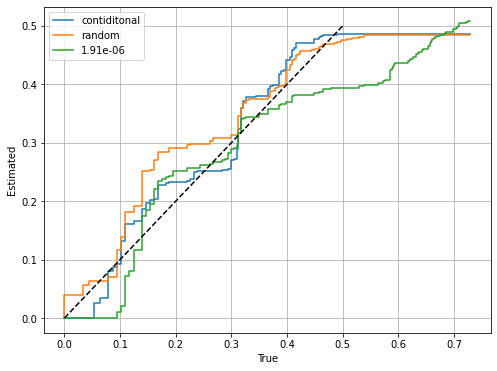

In [46]:
# plot estimated and true q-values
def combine_true_est(q_val_true,q_val_est):
    res = []
    q_idx = 0
    for q_e, _, score in q_val_est:
        while q_idx < len(q_val_true)-1 and q_val_true[q_idx+1][2] >= score:
            q_idx += 1
        res.append((score, q_val_true[q_idx][0], q_e))
    return res
        
scores, trues, estimateds = zip(*combine_true_est(q_list_true, q_list_estimated))
scores_rand, trues_rand, estimateds_rand = zip(*combine_true_est(q_list_true, q_list_estimated_rand))
to_plot = {'contiditonal':(trues,estimateds), 'random':(trues_rand,estimateds_rand)}
for k,v in q_list_knockoffs.items():
    to_plot[k] = list(zip(*combine_true_est(q_list_true, v)))[1], list(zip(*combine_true_est(q_list_true, v)))[2]

import plot_q_vals
plot_q_vals.plot_q_vals( to_plot )